<font color = green >


# HOMEWORK Lesson21 - Market Basket Analysis

</font>


In [1]:
# !pip install apyori

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori


<font color = green >


# Read Data

</font>

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

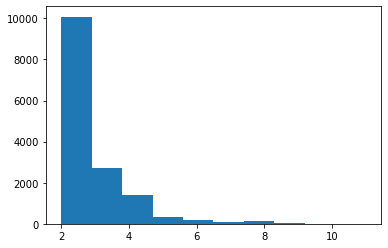

In [3]:
df = pd.read_csv('Groceries_dataset.csv')
df.head ()
len(df)
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

products = df["itemDescription"].unique()
products

<font color = green >


# Transaction selection

</font>

In [4]:
#---Transaction selection
df_dataprep=df.groupby(['Member_number','Date'])['itemDescription'].apply(','.join).reset_index()
transactions=df_dataprep[['itemDescription']].values
trans=[(''.join(i).split(",")) for i in transactions]
print(trans)

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['whole milk', 'pastry', 'salty snack'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles'], ['soda', 'pickled vegetables'], ['frankfurter', 'curd'], ['sausage', 'whole milk', 'rolls/buns'], ['whole milk', 'soda'], ['beef', 'white bread'], ['frankfurter', 'soda', 'whipped/sour cream'], ['frozen vegetables', 'other vegetables'], ['butter', 'whole milk'], ['tropical fruit', 'sugar'], ['butter milk', 'specialty chocolate'], ['sausage', 'rolls/buns'], ['root vegetables', 'detergent'], ['frozen meals', 'dental care'], ['rolls/buns', 'rolls/buns'], ['dish cleaner', 'cling film/bags'], ['canned beer', 'frozen fish'], ['other vegetables', 'hygiene articles'], ['pip fruit', 'whole milk', 'tropical fruit'], ['rolls/buns', 'red/blush wine', 'chocolate'], ['other vegetables', 'shopping bags'], ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'], ['root vegetables', 'whole milk', 'pastry'], ['rolls/buns

<font color = green >


# Rule settings

</font>

In [5]:
# Rule selection
rules = list(apriori(trans, min_support = 0.003,  min_confidence = 0.01, min_lift = 1.01, min_length = 2))
print(rules)
print(len(rules))

[RelationRecord(items=frozenset({'sausage', 'bottled beer'}), support=0.003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bottled beer'}), items_add=frozenset({'sausage'}), confidence=0.07374631268436578, lift=1.2220000849348451), OrderedStatistic(items_base=frozenset({'sausage'}), items_add=frozenset({'bottled beer'}), confidence=0.05537098560354374, lift=1.2220000849348451)]), RelationRecord(items=frozenset({'citrus fruit', 'yogurt'}), support=0.004611374724319989, ordered_statistics=[OrderedStatistic(items_base=frozenset({'citrus fruit'}), items_add=frozenset({'yogurt'}), confidence=0.08679245283018867, lift=1.0106423904265471), OrderedStatistic(items_base=frozenset({'yogurt'}), items_add=frozenset({'citrus fruit'}), confidence=0.053696498054474705, lift=1.0106423904265471)]), RelationRecord(items=frozenset({'other vegetables', 'frankfurter'}), support=0.005146026866270133, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frankfurter'}), item

<font color = green >

# Print rules

</font>

In [6]:
# Print rules in more details
def print_rules(rules):
    for rule in rules:
        print ('rule.items=', list(rule.items))
        print ('rule.support=',rule.support)

        for os in rule.ordered_statistics:
            print ('\titems_base=', list(os.items_base))
            print ('\tlifted_item =', list(os.items_add))
            print ('\tlift=', os.lift)
            print ('\tconfidence (i.e. cond prob {} if {})='.format(list(os.items_add), list(os.items_base)), os.confidence)
            print ('\t----')
        print ('\n')
        
print_rules(rules)

rule.items= ['sausage', 'bottled beer']
rule.support= 0.003341575887188398
	items_base= ['bottled beer']
	lifted_item = ['sausage']
	lift= 1.2220000849348451
	confidence (i.e. cond prob ['sausage'] if ['bottled beer'])= 0.07374631268436578
	----
	items_base= ['sausage']
	lifted_item = ['bottled beer']
	lift= 1.2220000849348451
	confidence (i.e. cond prob ['bottled beer'] if ['sausage'])= 0.05537098560354374
	----


rule.items= ['citrus fruit', 'yogurt']
rule.support= 0.004611374724319989
	items_base= ['citrus fruit']
	lifted_item = ['yogurt']
	lift= 1.0106423904265471
	confidence (i.e. cond prob ['yogurt'] if ['citrus fruit'])= 0.08679245283018867
	----
	items_base= ['yogurt']
	lifted_item = ['citrus fruit']
	lift= 1.0106423904265471
	confidence (i.e. cond prob ['citrus fruit'] if ['yogurt'])= 0.053696498054474705
	----


rule.items= ['other vegetables', 'frankfurter']
rule.support= 0.005146026866270133
	items_base= ['frankfurter']
	lifted_item = ['other vegetables']
	lift= 1.116149594